# Rauschen und spektrale Dichte

In diesem Kapitel befassen wir uns mit Rauschen und werden Methoden zur Analyse betrachten. Als Vorkenntnisse solltest du die Einheit decibel (dB) mitbringen.


::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Lecture in english from Prof. Ali Hajimiri, Caltech

<iframe width="220" height="315" src="https://www.youtube.com/embed/RF3arUN1n1A" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
::::
:::::
::::::

## Gauß'sches Rauschen

### Zeitbereich
Rauschen ist nichts anderes als ungewünschte Fluktuationen in unserem Signal und sieht z.B. folgendermaßen aus:

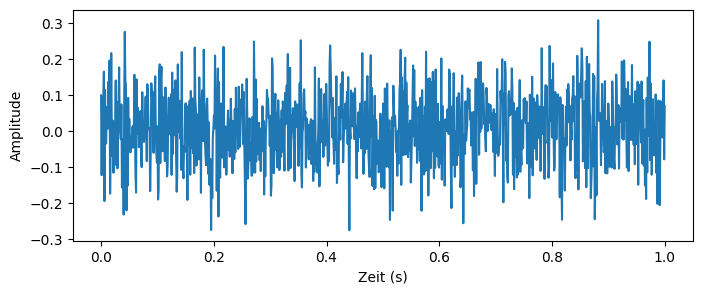

In [1]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
from scipy import signal 
import scipy.integrate as spi
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße
plt.figure(figsize=(8,3)) # Plot-Größe

## --- Weißes / Gauß'sches Rauschen ---------------------------------
T = 1
t = np.linspace(0, T, 1000, endpoint = True)
y_wn = np.random.normal(scale=0.1, size=t.shape)

plt.plot(t, y_wn,'tab:blue')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.show()

In diesem Beispiel-Plot ist der Mittelwert Null. Wäre er von Null verschieden, so könnte man ihn von der Messung abziehen. Dies nennt man in der Messtechnik auch *offset* oder *bias*. Außerdem fällt auf, dass die einzelnen Messpunkte nicht *uniform zufällig* sind. Größere Amplituden findet man seltener als Messpunkte, deren Amplituden nah an der Null liegen. Daher wird diese Art von Rauschen auch **Gauß'sches (oder weißes) Rauschen** genannt. Diese Art von Rauschen findet man bei jeder Messung und ist dient als Modell um natürliche Rauschquellen zu beschreiben (thermische Vibrationen von Atomen in *Gauß-verteilt*). 

Der **zentrale Grenzwertsatz** im Kapitel [Statistische Größen](1_Mittelwert_StdAbw) sagt uns, dass die Summe von vielen zufälligen Prozessen wieder eine Gauß-Verteilung ergibt. Selbst wenn die einzelnen Prozesse einer anderen Verteilung folgen. Das heißt selbst wenn eine Menge Mist während der Messung passiert, ist das zugrundeliegende Rauschen höchstwahrscheinlich Gauß'sches / weiß. 

### Rauschleistung

Da das Rauschen einer Gauß-Verteilung folgt können auch hierfür die bekannten Kenngrößen *Mittelwert* und *Varianz* berechnet werden.
Die **Varianz** des Rauschens ist ein Maß für die **Stärke des Rauschens**. Daher definiert die Varianz auch die **Rauschleistung**. 

## Spektrale Leistungsdichte (PSD)

Für stochastische Prozesse, also Rauschen, existieren weder Definitionen für *Energie* noch die Fourier-Transformierte. Die spektrale Leistungsdichte (auf engl. power spectral density, PSD) kann jedoch verwendet werden um stochastische Rauschen im Frequenzbereich zu untersuchen. 

PSD ist die Leistung eines Signals auf eine bestimmte Bandbreite bzw. Frequenz bezogen. Im Gegensatz zur Fourier-Transformation wird hierbei also noch einmal durch die Frequenz geteilt, wobei die Bandbreite immer schmaler, also besonders klein, gewählt wird. Sie hat also die Einheit W/Hz oder dBm/Hz. 
Das Integral über die PSD über alle Frequenzen ergibt die Gesamtleistung des Signals. 

Klassische Messgeräte, so genannte Spektralanalysatoren, zeigen nicht die mathematisch ideale PSD an, sondern nur das Spektrum über eine vorher ausgewählte, endliche Bandreite. 

### Definition

Die PSD wird nach dem Wiener-Chintschin-Theorem definiert und wird häufig als Fourier-Transformierte der Autokorrelationsfunktion, 

$$r_{xx}(t) = \lim_{T\rightarrow\infty} \frac{1}{2T} \int_{-T}^T f(\tau) \overline{f(t+\tau)} d\tau$$

des Zeitsignals $f(t)$ definiert als:

$$S_{XX}(\omega) = \frac{1}{\sqrt{2\pi}} \mathcal F(r_{xx})(\omega) = \frac{1}{2\pi} \int_{\infty}^{\infty} r_{xx}(t) \mathrm e^{-j\omega t} dt$$

In Kapitel [Übertragungsfunktion](5_Uebertragungsfunktion.ipynb) befassen wir uns mit linear, zeitinvarianten System die eine Übertragungsfunktion $H(\omega)$ aufweisen. Rauschprozesse mit PSD propagieren anders als Signale durch dieses System, da es sich um eine **Leistungs**größe handelt. Den Ausgang eines Messsystems, mit einem Eingangsrauschen von $S_{XX}(\omega)$, berechnet sich also mittels:

$$S_{YY}(\omega) = \left| H(\omega) \right|^2 \cdot S_{XX}(\omega)$$

Strom und Spannung werden weiterhin nur mit $H(\omega)$ multipliziert.

Für die obige Zeitreihe von Gauß'schem Rauschen erhalten wir folgende PSD:

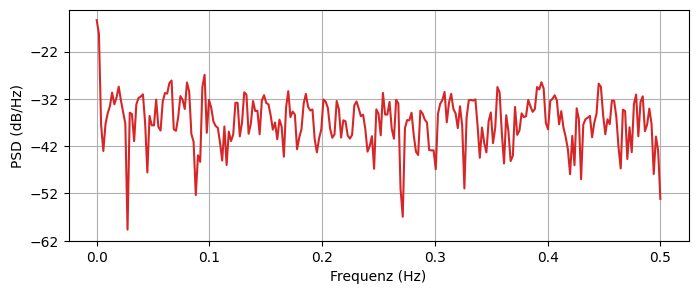

In [2]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße
plt.figure(figsize=(8,3)) # Plot-Größe

Fs = 1/T
plt.psd(y_wn**2, 512, Fs, color ="tab:red")
plt.xlabel('Frequenz (Hz)')
plt.ylabel('PSD (dB/Hz)')
plt.show()

## Signal-Rausch-Verhältnis

Die PSD ist wesentlicher Bestandteil zur Berechnung des Signal-Rausch-Verhältnises (engl: signal-to-noise-ratio, SNR). 

* Der SNR ist ein **Maß für die Qualität** eines Nutzsignals (Audio, Messsignal, ...) das in einem Rauschsignal eingebettet ist.
* Es dient außerdem als **Grenzwert**, ab wann ein Empfänger das Signal vom Rauschen unterscheiden kann. Damit ein Mensch in einer verrauschten Umgebung Sprache heraus hören kann wird ein SNR von 6dB benötigt.
* Mit dem SNR werden ADUs bewertet. Das Rauschen ist hier die **Quantisierungsabweichung**.

### Definition

Der SNR berechnet sich aus den Verhältnissen der mittleren Leistungen von Signal, $P$ und Rauschen, $P_\mathrm{Rauschen}$ (PSD):

$$\mathrm{SNR} = \frac{P}{P_\mathrm{Rauschen}} = 10 \log \left(\frac{P}{P_\mathrm{Rauschen}} \right)$$

Im letzten Schritt wurde der logarithmische Maßstab benutzt um den SNR darzustellen. Dies ist wichtig da Signal- und Rauschleistung meistens (hoffentlich) mehrere Größenordnungen auseinander liegen. 

Da die Leistung auch durch die Varianz des Signals gegeben ist, kann man auch folgende Formel benutzen:

$$\mathrm{SNR} = \frac{\sigma^2}{\sigma^2_\mathrm{Rauschen}} $$

In der Spektroskopie oder Bildbearbeitung definiert man den sNR auch häufig über die Signal*amplitude* $A$ und der Standardabweichung des Rauschens $\sigma_\mathrm{Rauschen}$:

$$\mathrm{SNR} = \frac{A}{\sigma_\mathrm{Rauschen}}$$

Für zwei Sinussignale, die mit Rauschen, $\tilde u(t)$, überlagert werden, definieren wir folgende Zeitserie und plotten das PSD:

$$u(t) = \sin(2\pi \cdot 10\,\mathrm{Hz} \cdot t) + \sin(2\pi \cdot 60\,\mathrm{Hz} \cdot t) + \tilde u(t)$$

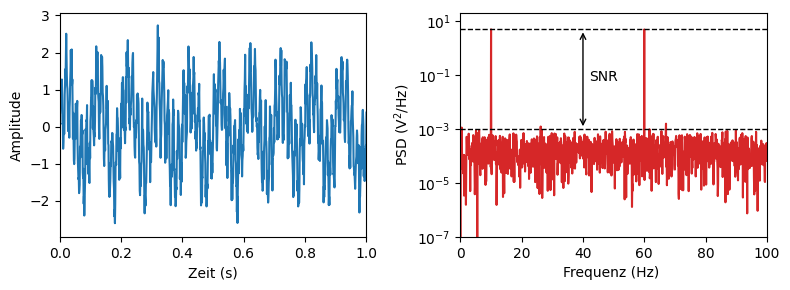

Das SNR beträgt circa:  85.29924566887225 dB


In [3]:
import scipy.signal
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(8,3)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

fs = 1000.0 # 1 kHz sampling frequency
F1 = 10 # First signal component at 10 Hz
F2 = 60 # Second signal component at 60 Hz
T = 10 # 10s signal length
N0 = -10 # Noise level (dB)

t = np.r_[0:T:(1/fs)] # Sample times

# Zwei Sinussignale bei den Frequenzen F1 und F2
signal = np.sin(2 * F1 * np.pi * t) + np.sin(2 * F2 * np.pi * t) 

# Weißes Rauschen mit der Leistung N0
noise = np.random.randn(len(signal)) * 10**(N0/20.0) 
signal += noise

# PSD:
(f, S) = scipy.signal.periodogram(signal, fs, scaling='density')
S_peak =  np.max(S)

plt.subplot(1,2,1)
plt.plot(t,signal, 'tab:blue')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.xlim(0,1)

plt.subplot(1,2,2)
plt.semilogy(f,S, color ="tab:red")
plt.axhline(y = S_peak,  color ="k", ls = '--', lw=1)
plt.axhline(y = 1e-3,  color ="k", ls = '--', lw=1)
plt.xlabel('Frequenz (Hz) ')
plt.ylabel(r'PSD $(\mathrm{V^2/Hz})$')
plt.annotate('SNR', xy=(42, 0.06),
            xytext=(42, 0.06), color = 'k'
            )
plt.annotate('', xy=(40, 1e-3),
            xytext=(40, 5), color = 'k',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3", color = 'k')
            )
plt.xlim([0,100])
plt.ylim([1e-7, 2e1])
plt.tight_layout()
plt.show()

print('Das SNR beträgt circa: ', 10*np.log(S_peak / 1e-3), 'dB')

### Träger-Rausch-Verhältnis

Bei Modulationsverfahren wie wir sie in Kapitel [Modulationen](3_Modulationen.ipynb) behandeln bezieht man das Rauschen nicht auf das Signal, sondern auf den Träger (engl. *carrier*). Bei der PM oder FM lassen sich nämlich Träger- und Signalleistung nicht voneinander trennen. 



## Welch's Methode

Es kann mitunter sehr lange dauern eine PSD zu berechnen. Daher bietet es sich an eine Näherung zu nutzen, die **Welch's Methode**. 
Hierfür wird der vorliegende Datensatz in $N$ Segmente einer festen Länge $M$ aufgeteilt. Für jedes dieser Segmente wird anschließend die diskrete Fourier-Transformierte berechnet (die Version bei der *nicht* durch $M$ geteilt wird). Die berechneten Amplituden werden quadriert und anschließend durch $M$ geteilt. Die DFTs der $N$ Segmente werden anschließend gemittelt. Durch die Mittelung wird die Varianz und somit das Rauschen reduziert. Ausgegeben werden Leistungsmessungen gegenüber Frequenz-Bins.  

Die Frequenzkomponenten werden auch hiermit noch genug angenähert. Durch die Vergrößerung der Segmentlänge, kann das Ergebnis verbessert werden:

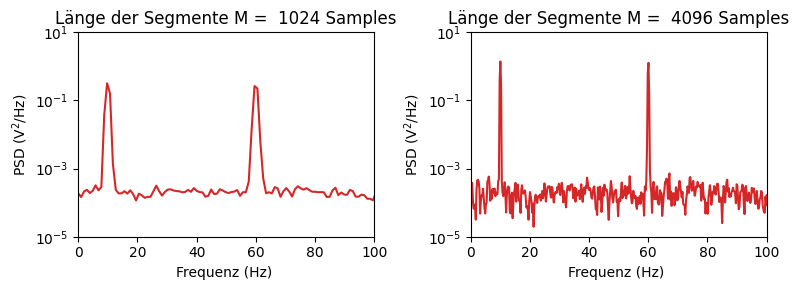

In [4]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(8,3)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

# PSD:
length=1024
(f, S) = scipy.signal.welch(signal, fs, nperseg=length)

plt.subplot(1,2,1)
plt.semilogy(f,S, color ="tab:red")
plt.xlabel('Frequenz (Hz) ')
plt.ylabel(r'PSD $(\mathrm{V^2/Hz})$')
plt.title('Länge der Segmente M = %5.0f Samples' %(length))
plt.xlim([0,100])
plt.ylim([1e-5, 1e1])

length=4*1024
(f, S) = scipy.signal.welch(signal, fs, nperseg=length)

plt.subplot(1,2,2)
plt.semilogy(f,S, color ="tab:red")
plt.xlabel('Frequenz (Hz) ')
plt.ylabel(r'PSD $(\mathrm{V^2/Hz})$')
plt.xlim([0,100])
plt.ylim([1e-5, 1e1])
plt.title('Länge der Segmente M = %5.0f Samples' %(length))
plt.tight_layout()
plt.show()